In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
telecom = pd.read_csv("churn-bigml-20.csv")

In [3]:
telecom.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [4]:
telecom.shape

(667, 20)

In [5]:
telecom.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,102.841079,436.157421,8.407796,180.948126,100.937031,30.761769,203.355322,100.476762,17.285262,199.685307,100.113943,8.985907,10.238381,4.527736,2.764948,1.563718
std,40.819480,41.783305,13.994480,55.508628,20.396790,9.436463,49.719268,18.948262,4.226160,49.759931,20.172505,2.239429,2.807850,2.482442,0.758167,1.333357
min,1.000000,408.000000,0.000000,25.900000,30.000000,4.400000,48.100000,37.000000,4.090000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,408.000000,0.000000,146.250000,87.500000,24.860000,171.050000,88.000000,14.540000,167.950000,86.000000,7.560000,8.600000,3.000000,2.320000,1.000000
50%,102.000000,415.000000,0.000000,178.300000,101.000000,30.310000,203.700000,101.000000,17.310000,201.600000,100.000000,9.070000,10.500000,4.000000,2.840000,1.000000
75%,128.000000,415.000000,20.000000,220.700000,115.000000,37.520000,236.450000,113.000000,20.095000,231.500000,113.500000,10.420000,12.050000,6.000000,3.255000,2.000000
max,232.000000,510.000000,51.000000,334.300000,165.000000,56.830000,361.800000,168.000000,30.750000,367.700000,175.000000,16.550000,18.300000,18.000000,4.940000,8.000000


In [6]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [7]:
telecom.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

### Data Preparation

In [8]:
varlist = ['International plan','Voice mail plan']

def binary_map(x):
    return x.map({'Yes':1,'No':0})

telecom[varlist] = telecom[varlist].apply(binary_map)

In [9]:
telecom["Churn"] = telecom["Churn"].astype(bool).astype(int)

In [10]:
telecom.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1,IN,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
2,NY,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
3,SC,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
4,HI,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0


In [11]:
telecom.State.unique()

array(['LA', 'IN', 'NY', 'SC', 'HI', 'AK', 'MI', 'ID', 'VA', 'WI', 'MN',
       'VT', 'MT', 'MA', 'KY', 'CO', 'AZ', 'CA', 'WA', 'NE', 'OH', 'MO',
       'AL', 'NH', 'NM', 'OR', 'TX', 'MS', 'WY', 'FL', 'KS', 'NC', 'SD',
       'OK', 'CT', 'RI', 'DE', 'UT', 'NV', 'DC', 'ME', 'IL', 'NJ', 'MD',
       'WV', 'PA', 'ND', 'AR', 'TN', 'IA', 'GA'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

telecom['State'] = label_encoder.fit_transform(telecom['State'])

In [13]:
telecom.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,18,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1,15,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
2,34,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
3,40,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
4,11,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0


In [14]:
telecom.State.unique()

array([18, 15, 34, 40, 11,  0, 22, 13, 45, 48, 23, 46, 26, 19, 17,  5,  3,
        4, 47, 29, 35, 24,  1, 30, 32, 37, 43, 25, 50,  9, 16, 27, 41, 36,
        6, 39,  8, 44, 33,  7, 21, 14, 31, 20, 49, 38, 28,  2, 42, 12, 10])

### Train-test split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = telecom.drop(['Churn'], axis = 1)
y = telecom['Churn']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size= 0.3, random_state = 70)

### Churn rate

In [18]:
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index)) * 100

In [19]:
churn

14.24287856071964

### Looking at correlations

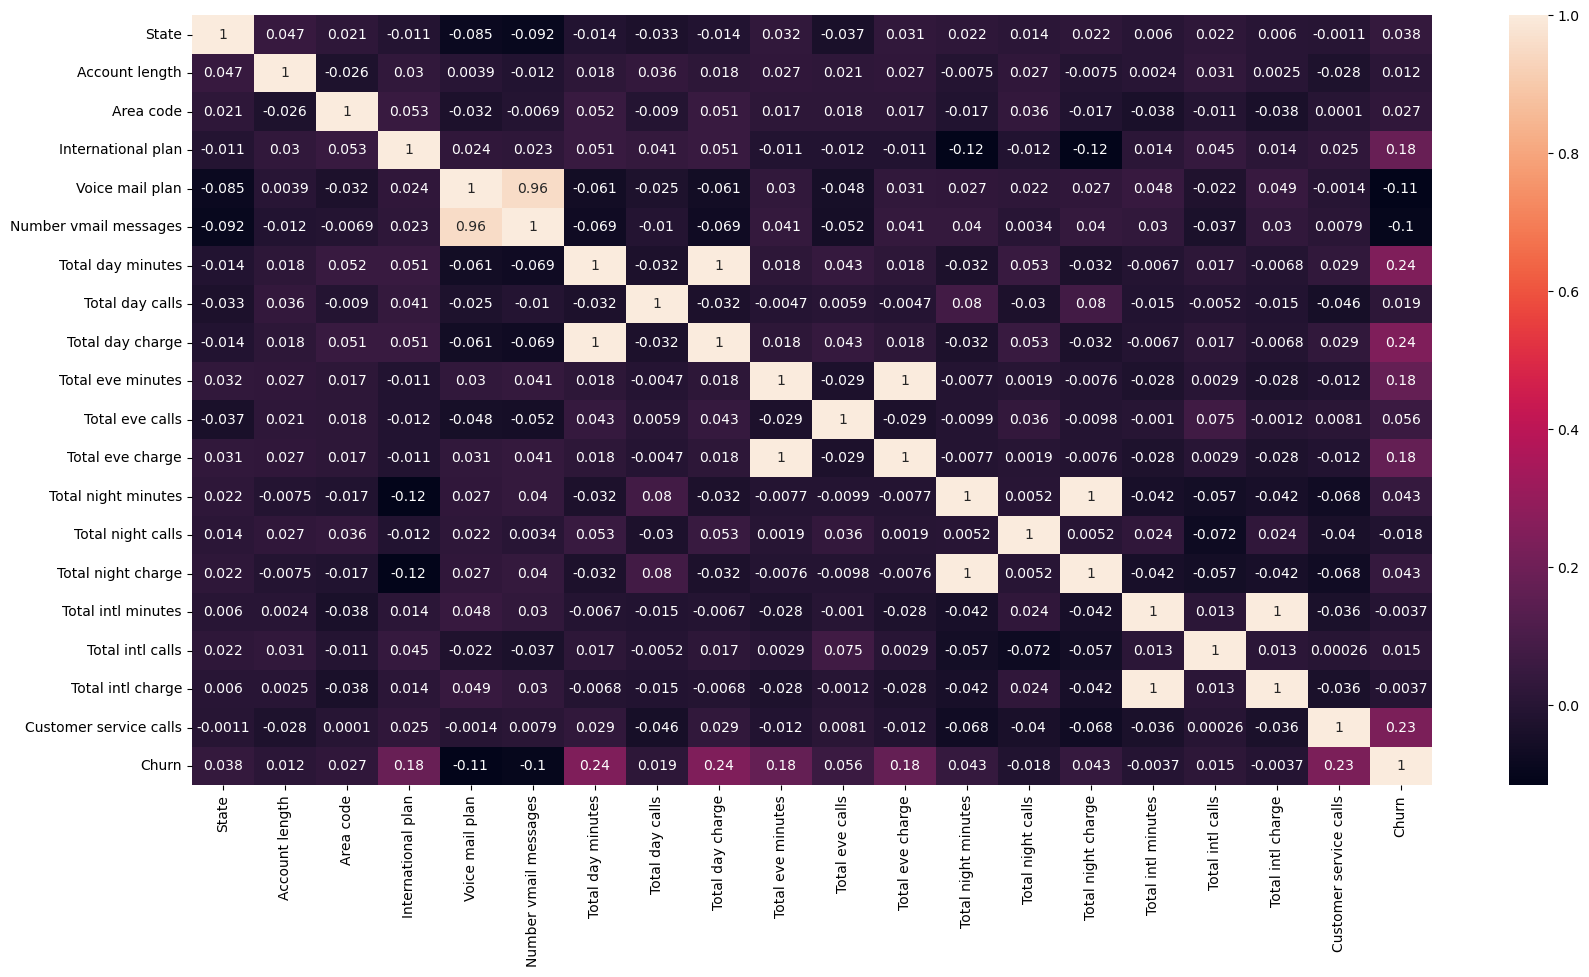

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(telecom.corr(), annot = True)
plt.show()

### Feature selection using RFE

In [21]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [22]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=8)
rfe = rfe.fit(X_train, y_train)

In [23]:
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('State', True, 1),
 ('Account length', False, 11),
 ('Area code', True, 1),
 ('International plan', True, 1),
 ('Voice mail plan', True, 1),
 ('Number vmail messages', True, 1),
 ('Total day minutes', True, 1),
 ('Total day calls', False, 7),
 ('Total day charge', False, 8),
 ('Total eve minutes', False, 4),
 ('Total eve calls', False, 6),
 ('Total eve charge', False, 9),
 ('Total night minutes', False, 10),
 ('Total night calls', False, 3),
 ('Total night charge', False, 12),
 ('Total intl minutes', True, 1),
 ('Total intl calls', False, 2),
 ('Total intl charge', False, 5),
 ('Customer service calls', True, 1)]

In [24]:
col = X_train.columns[rfe.support_]
col

Index(['State', 'Area code', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total intl minutes',
       'Customer service calls'],
      dtype='object')

In [25]:
X_train.columns[~rfe.support_]

Index(['Account length', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl calls', 'Total intl charge'],
      dtype='object')

### Accessing the model with stats model

In [26]:
import statsmodels.api as sm

In [27]:
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                  466
Model:                            GLM   Df Residuals:                      457
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -148.98
Date:                Wed, 02 Oct 2024   Deviance:                       297.95
Time:                        18:27:57   Pearson chi2:                     424.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1745
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -6.4102      1.776     -3.610      0.000      -9.891      -2.930
State                      0.0224      0.011      2.097      0.036       0.001       0.043
Area code                 -0.0006      0.004     -0.169      0.866      -0.008       0.006
International plan         1.6785      0.448      3.745      0.000       0.800       2.557
Voice mail plan           -3.9341      1.719     -2.288      0.022      -7.304      -0.564
Number vmail messages      0.0909      0.049      1.850      0.064      -0.005       0.187
Total day minutes          0.0167      0.003      5.709      0.000       0.011       0.022
Total intl minutes         0.0210      0.056      0.376      0.707      -0.089       0.131
Customer service calls     0.4551      0.108      4.225      0.000       0.244       0.666
==========================================================================================
"""

In [28]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

350    0.035828
632    0.046776
216    0.200815
4      0.022184
254    0.003455
194    0.019253
439    0.110681
223    0.049989
580    0.188218
177    0.414779
dtype: float64

In [29]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0358285 , 0.0467764 , 0.20081542, 0.02218419, 0.00345541,
       0.01925337, 0.11068131, 0.04998898, 0.18821802, 0.41477858])

In [30]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values,'Churn_prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_prob,CustID
0,0,0.035828,350
1,0,0.046776,632
2,0,0.200815,216
3,0,0.022184,4
4,0,0.003455,254


### Plotting the ROC curve

In [31]:
from sklearn import metrics

In [32]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [33]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_prob, drop_intermediate = False )

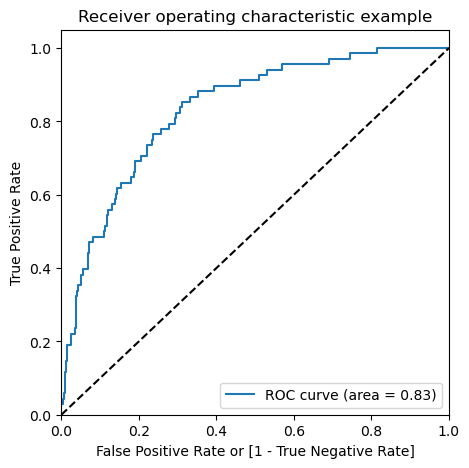

In [34]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_prob)

### Finding the optimal cut-off

In [35]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.035828,350,1,0,0,0,0,0,0,0,0,0
1,0,0.046776,632,1,0,0,0,0,0,0,0,0,0
2,0,0.200815,216,1,1,1,0,0,0,0,0,0,0
3,0,0.022184,4,1,0,0,0,0,0,0,0,0,0
4,0,0.003455,254,1,0,0,0,0,0,0,0,0,0


In [36]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.145923  1.000000  0.000000
0.1   0.1  0.669528  0.882353  0.633166
0.2   0.2  0.796137  0.632353  0.824121
0.3   0.3  0.851931  0.485294  0.914573
0.4   0.4  0.864807  0.367647  0.949749
0.5   0.5  0.860515  0.191176  0.974874
0.6   0.6  0.862661  0.147059  0.984925
0.7   0.7  0.854077  0.044118  0.992462
0.8   0.8  0.858369  0.029412  1.000000
0.9   0.9  0.854077  0.000000  1.000000


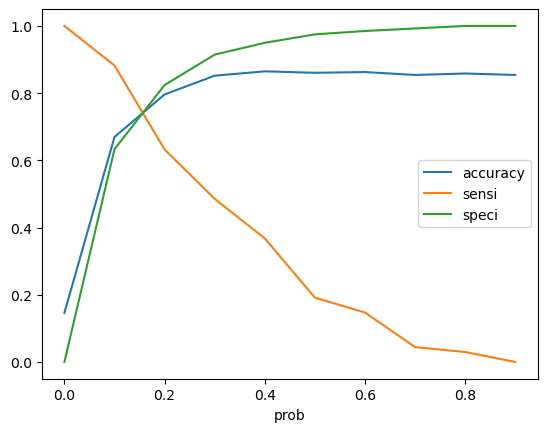

In [37]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Precision and recall trade off

In [43]:
from sklearn.metrics import precision_recall_curve

In [44]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(0      0
 1      0
 2      0
 3      0
 4      0
       ..
 461    0
 462    0
 463    1
 464    0
 465    0
 Name: Churn, Length: 466, dtype: int64,
 0      0
 1      0
 2      1
 3      0
 4      0
       ..
 461    0
 462    0
 463    1
 464    0
 465    0
 Name: predicted, Length: 466, dtype: int64)

In [45]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_prob)

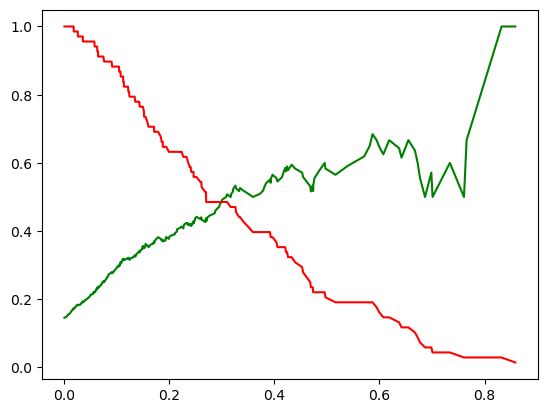

In [46]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

From the curve we can say that 0.25 will be optimal

In [47]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x > 0.25 else 0)
y_train_pred_final.head()

,Churn,Churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.035828,350,1,0,0,0,0,0,0,0,0,0,0
1,0,0.046776,632,1,0,0,0,0,0,0,0,0,0,0
2,0,0.200815,216,1,1,1,0,0,0,0,0,0,0,0
3,0,0.022184,4,1,0,0,0,0,0,0,0,0,0,0
4,0,0.003455,254,1,0,0,0,0,0,0,0,0,0,0


In [48]:
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.8326180257510729

In [49]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.predicted)
print(confusion)

[[350  48]
 [ 30  38]]


In [41]:
# predicted      not_churn     churn
# actual

#not_churn         350          48
#churn             30           38

#### Precision

In [71]:
confusion[1,1]/(confusion[1,1]+confusion[0,1])

0.4418604651162791

#### Recall

In [72]:
confusion[1,1]/(confusion[1,1]+confusion[1,0])

0.5588235294117647

### Making predictions on test set

In [50]:
X_test = X_test[col]

In [51]:
X_test_sm = sm.add_constant(X_test)

In [52]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

444    0.185850
418    0.615038
603    0.080947
579    0.422906
189    0.050571
227    0.372350
171    0.107857
218    0.326083
427    0.117003
421    0.228218
dtype: float64

In [53]:
# converting y_pred to a dataframe which is an array

In [55]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
444,0.185850
418,0.615038
603,0.080947
579,0.422906
189,0.050571


In [56]:
y_test_df = pd.DataFrame(y_test)

In [57]:
y_test_df['CustID'] = y_test_df.index

In [58]:
y_pred_1.reset_index(drop = True, inplace = True)
y_test_df.reset_index(drop = True, inplace= True)

In [59]:
y_pred_final = pd.concat([y_test_df,y_pred_1],axis = 1)

In [60]:
y_pred_final.head()

,Churn,CustID,0
0,0,444,0.185850
1,0,418,0.615038
2,0,603,0.080947
3,0,579,0.422906
4,0,189,0.050571


In [61]:
y_pred_final= y_pred_final.rename(columns={0:'Churn_Prob'})

In [62]:
y_pred_final = y_pred_final.reindex(columns=['CustID','Churn','Churn_Prob'])

In [63]:
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,444,0,0.185850
1,418,0,0.615038
2,603,0,0.080947
3,579,0,0.422906
4,189,0,0.050571


In [65]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.25 else 0)

In [66]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[143,  31],
       [ 17,  10]])

In [68]:
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.7611940298507462

#### Precision 

In [70]:
confusion2[1,1]/(confusion2[1,1]+confusion2[0,1])

0.24390243902439024

#### Recall

In [73]:
confusion2[1,1]/(confusion2[1,1]+confusion2[1,0])

0.37037037037037035